## Creating Visualizations using Matplotlib, Seaborn and Folium

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>


In [2]:
import requests
import pandas as pd
from io import StringIO

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

response = requests.get(URL)
response.raise_for_status()  # ensure download succeeded

df = pd.read_csv(StringIO(response.text))

print("Data downloaded and read into a dataframe!")
df.head()


Data downloaded and read into a dataframe!


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# Creating Visualizations for Data Analysis

Develop a Line Chart using the functionality of pandas to show how automobile sales fluctuate from year to year

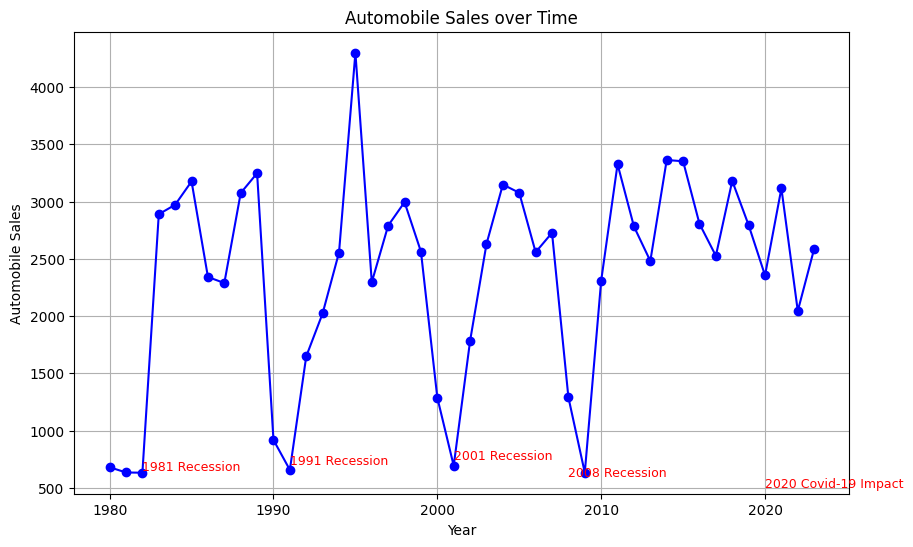

In [5]:
#create data for plotting
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

#create figure
plt.figure(figsize=(10,6))
df_line.plot(kind='line', marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales over Time')
plt.text(1982, 650, '1981 Recession', fontsize=9, color='red')
plt.text(1991, 700, '1991 Recession', fontsize=9, color='red')
plt.text(2001, 750, '2001 Recession', fontsize=9, color='red')
plt.text(2008, 600, '2008 Recession', fontsize=9, color='red')
plt.text(2020, 500, '2020 Covid-19 Impact', fontsize=9, color='red')
plt.grid()
plt.show()

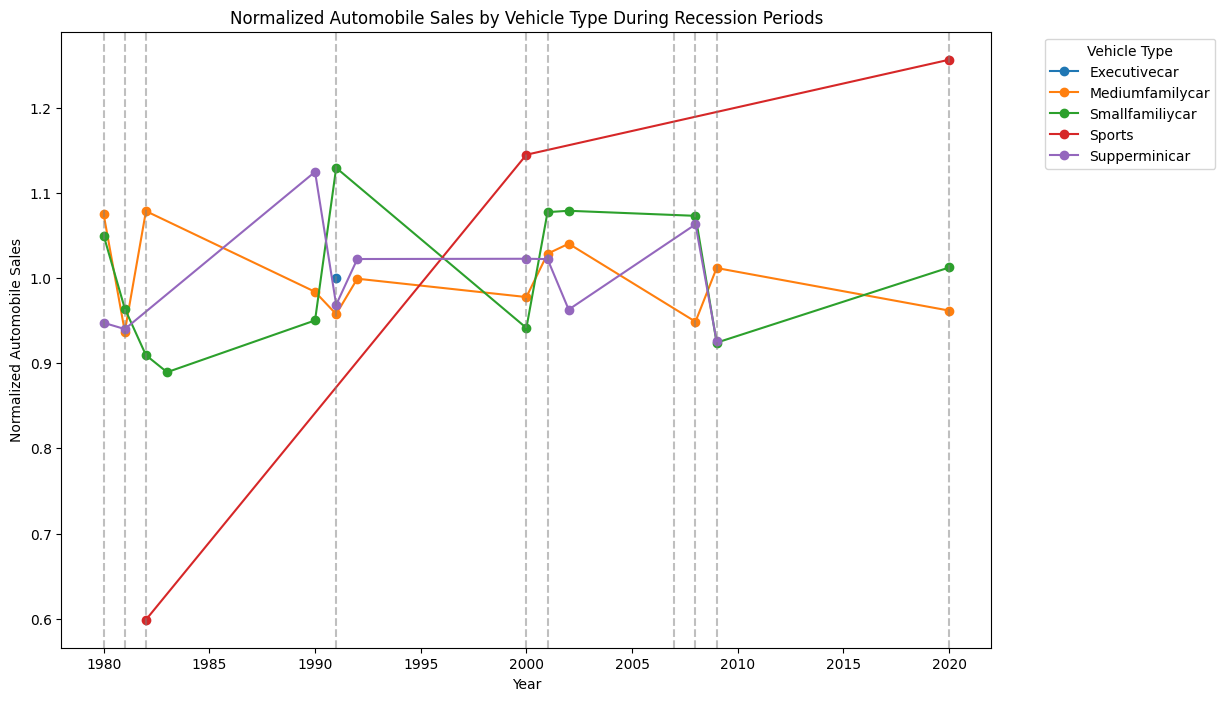

In [14]:
df_rec = df[df['Recession'] == 1]

#Calculate the average automobile sales by year and vehicle type during recession periods
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

#Calculate the normalized sales by dividing by the aveage sales for each vehicle type
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

df_Mline.set_index('Year', inplace=True)

#Create the plot for each vehicle type
plt.figure(figsize=(12,8))
for vehicle_type, group in df_Mline.groupby('Vehicle_Type'):
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], marker='o', label=vehicle_type)

#Highlight recession years
recession_years = [1980, 1981, 1982, 1991, 2000, 2001, 2007, 2008, 2009, 2020]
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

#Add legend, labels and title
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Normalized Automobile Sales')
plt.title('Normalized Automobile Sales by Vehicle Type During Recession Periods')

plt.show()

# Using the functionality of Seaborn to create a visualization to compare the sales trend per vehicle type for a reession period with a non-recession period

C:\Users\kobes\AppData\Local\Temp\ipykernel_1984\2414922222.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Recession', y='Automobile_Sales', data=new_df, palette='viridis')


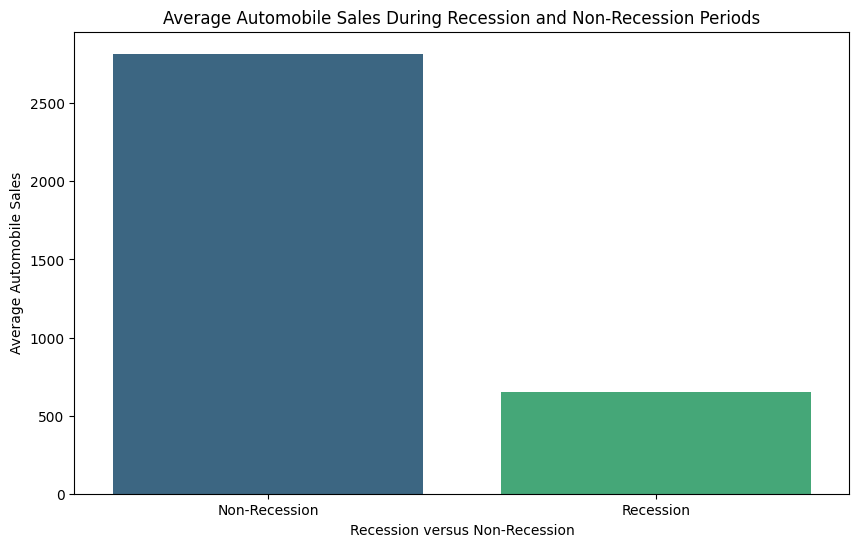

In [16]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

#Create the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Recession', y='Automobile_Sales', data=new_df, palette='viridis')
plt.xlabel('Recession versus Non-Recession')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales During Recession and Non-Recession Periods')
plt.xticks([0, 1], ['Non-Recession', 'Recession'])
plt.show()

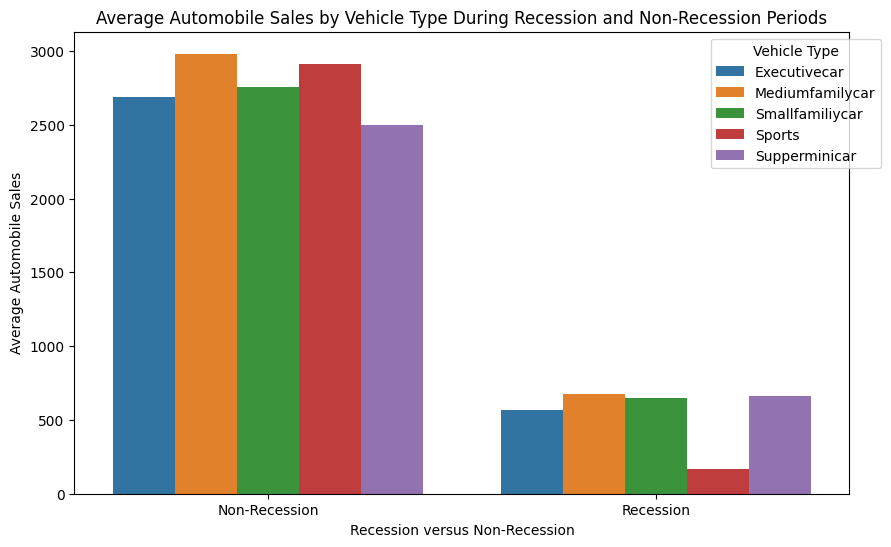

In [20]:
grouped_df = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

#create the grouped bar chart using seaborn
plt.figure(figsize=(10,6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=grouped_df)
plt.xticks([0, 1], ['Non-Recession', 'Recession'])
plt.xlabel('Recession versus Non-Recession')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales by Vehicle Type During Recession and Non-Recession Periods')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper right')
plt.show()

# Using sub-plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period

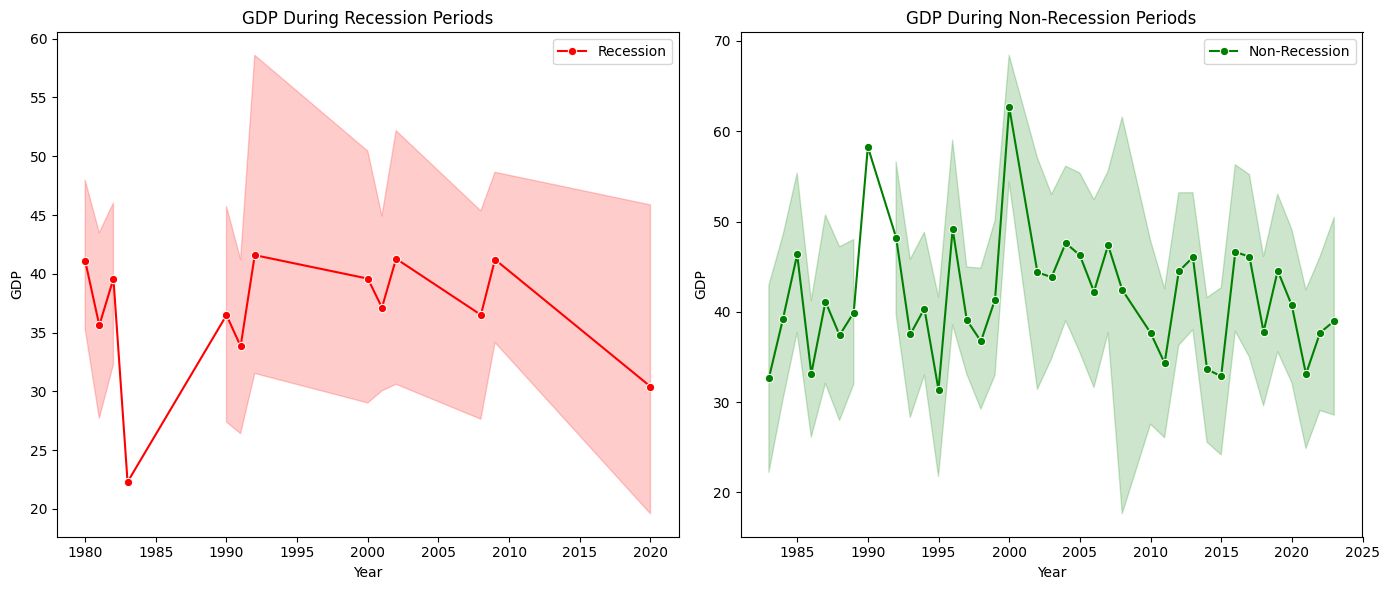

In [24]:
#create data for recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#figure
fig = plt.figure(figsize=(14,6))

#create different axes for subplotting
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

#Subplot 1: Recession Period
sns.lineplot(x='Year', y='GDP', data=rec_data, ax=ax0, marker='o', color='r', label='Recession')
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP During Recession Periods')

#Subplot 2: Non-Recession Period
sns.lineplot(x='Year', y='GDP', data=non_rec_data, ax=ax1, marker='o', color='g', label='Non-Recession')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP During Non-Recession Periods')

plt.tight_layout()
plt.show()

# Developing a Bubble plot for displaying the impact of seasonality on Automobile Sales

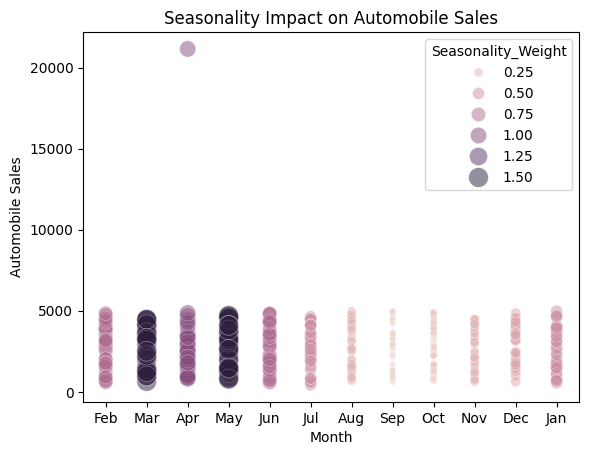

In [28]:
size = non_rec_data['Seasonality_Weight']

sns.scatterplot(x='Month', y='Automobile_Sales', size=size, sizes=(20, 200), alpha=0.5, data=non_rec_data, hue='Seasonality_Weight')

plt.xlabel('Month')
plt.ylabel('Automobile Sales') 
plt.title('Seasonality Impact on Automobile Sales')
plt.show()

# Using the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price related to the sales volume during recessions

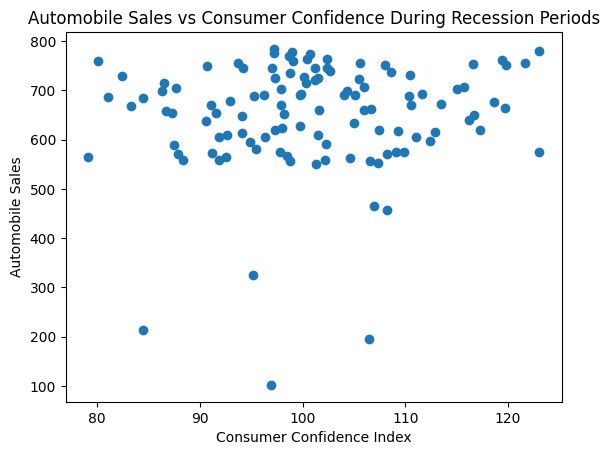

In [30]:
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

plt.xlabel('Consumer Confidence Index')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales vs Consumer Confidence During Recession Periods')
plt.show()

# Average vehicle price and the sales volume during recessions

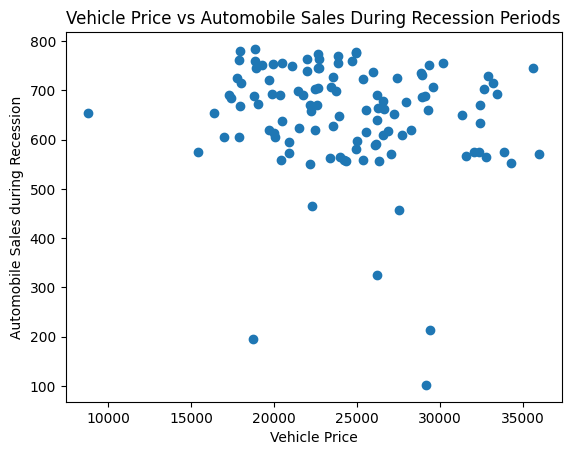

In [32]:
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

plt.xlabel('Vehicle Price')
plt.ylabel('Automobile Sales during Recession')
plt.title('Vehicle Price vs Automobile Sales During Recession Periods')
plt.show()

# Creating a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods

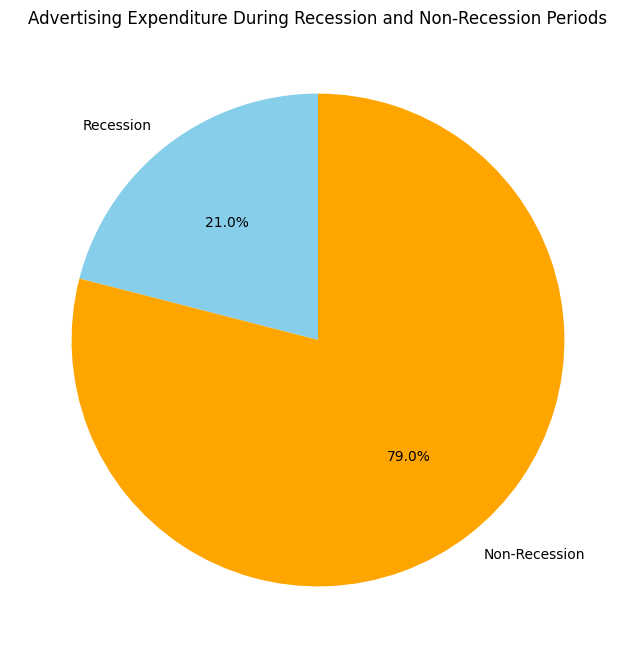

In [39]:
#filter the data
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

#calculate the total advertising expenditure for recession and non-recession periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

#create a pie chart for the advertising expenditure
plt.figure(figsize=(8,8))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Advertising Expenditure During Recession and Non-Recession Periods')
plt.show()

# Developing a pie chart to display the total advertisement expenditure for each vehicle type during recession period

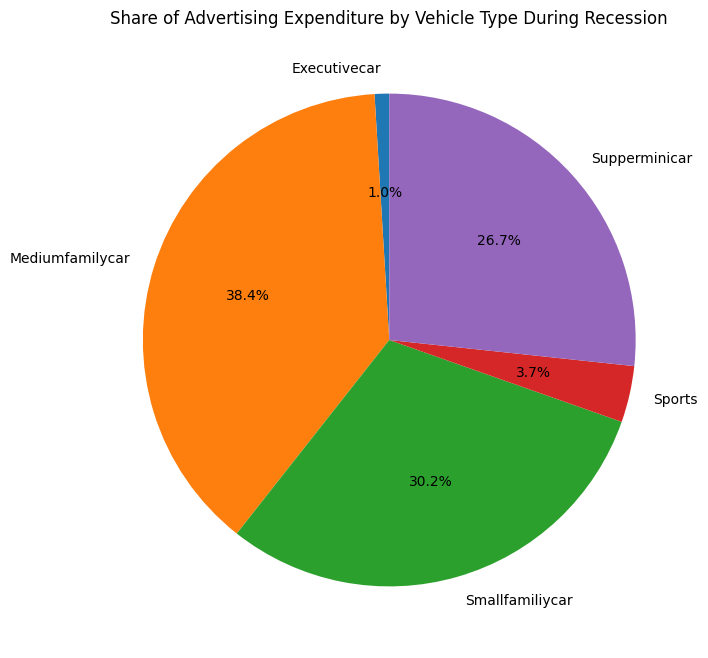

In [40]:
#calculate the sales volume by vehicle type during recession period
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

#create a pie chart for the share of each vehicle type in total expeinditure during recessions
plt.figure(figsize=(8,8))

labels = VTexpenditure.index
sizes = VTexpenditure.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Share of Advertising Expenditure by Vehicle Type During Recession')
plt.show()

# Developing a line plot to analyze the effect of the unemployment rate on vehicle type and sales during the recession period

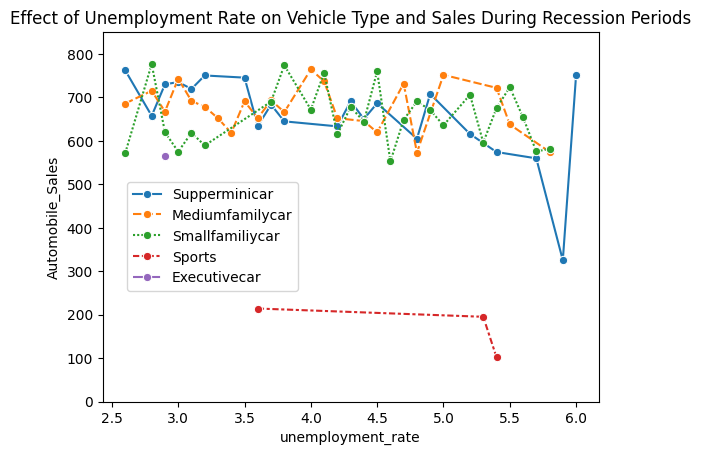

In [41]:
df_rec = df[df['Recession'] == 1]
sns.lineplot(x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', data=df_rec, marker='o', style='Vehicle_Type', err_style=None)

plt.ylim(0,850)
plt.legend(loc=(0.05,0.3))
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales During Recession Periods')
plt.show()

# Create a map on the highest sales region/offices of the company during recession period

In [42]:
import requests
from pathlib import Path

def download(url: str, filename: str) -> None:
    r = requests.get(url, timeout=30)
    r.raise_for_status()  # raises with a readable stacktrace on HTTP errors
    Path(filename).write_bytes(r.content)

path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json"
download(path, "us-states.json")
filename = "us-states.json"
print("Saved:", filename)


Saved: us-states.json


In [47]:
#filter the data for the recession period and specific cities
recession_data = df[df['Recession'] == 1]

#calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

#create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

#create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data='us-states.json',
    name='choropleth',
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Automobile Sales by City During Recession'
).add_to(map1)

#add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=False)
)
#display the map
display(map1)